<a href="https://colab.research.google.com/github/Shai670/Residential_consumption_modeling/blob/main/Battery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from IPython.display import clear_output 

import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/Shai670/Residential_consumption_modeling
clear_output()

In [ ]:
pv = pd.read_csv('/content/Residential_consumption_modeling/DATA/PV_1.5.csv', index_col='time')
pv.index = pd.to_datetime(pv.index)
pv

,AC
time,
2021-01-01 06:00:00,-0.450000
2021-01-01 07:00:00,-0.450000
2021-01-01 08:00:00,-0.450000
2021-01-01 09:00:00,101.638826
2021-01-01 10:00:00,355.759449
...,...
2022-01-01 01:00:00,-0.450000
2022-01-01 02:00:00,-0.450000
2022-01-01 03:00:00,-0.450000


In [ ]:
load = pd.DataFrame(index=pd.date_range(start='2021-01-01 00:00:00', end='2021-12-31 23:59:00', freq='MIN'))
load['load'] = np.random.rand(len(load))
load

,load
2021-01-01 00:00:00,0.515504
2021-01-01 00:01:00,0.873390
2021-01-01 00:02:00,0.944302
2021-01-01 00:03:00,0.833149
2021-01-01 00:04:00,0.284837
...,...
2021-12-31 23:55:00,0.190205
2021-12-31 23:56:00,0.752079
2021-12-31 23:57:00,0.073533
2021-12-31 23:58:00,0.817308


In [57]:
class battery:
  

  def __init__(self, Pnom, capacity):
    self.Pnom = Pnom # номинальная мощность батареи
    self.capacity = capacity # ёмкость Вт*ч
    
    self.SOC_min = 30
    self.SOC_max = 90
    self.SOC = self.SOC_min

    #self.capacity_fact = self.SOC/100 * self.capacity

  def working (self, Pgen, Pload):
     Pbat = 0

     if Pgen > Pload:
       if self.SOC <= self.SOC_max:
         if (Pgen - Pload) >= self.Pnom:
           Pbat = self.Pnom 
         elif (Pgen - Pload) < self.Pnom:
           Pbat = Pgen - Pload

     else: 
       if self.SOC >= self.SOC_min: 
         if Pload - Pgen >= self.Pnom:
           Pbat = -self.Pnom 
         elif Pload - Pgen < self.Pnom:
           Pbat = -(Pload-Pgen)

     self.SOC += 1/60 * Pbat / self.capacity

     # self.capacity_fact += 1/60 * Pbat
     # self.SOC = self.capacity_fact / self.capacity * 100
    
     return Pbat
                

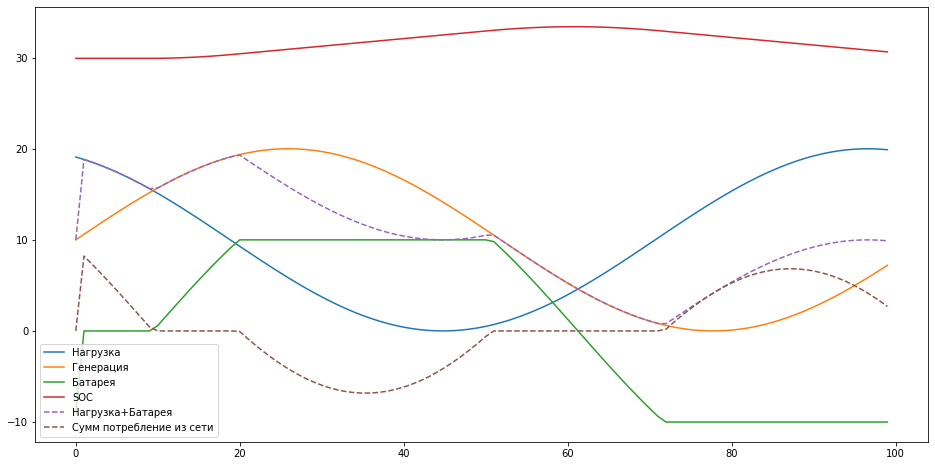

In [58]:
bat = battery(Pnom=10, capacity=2)
Pgen  = np.sin(np.linspace(0,6,100))*10 + 10
Pload = np.sin(np.linspace(0,6,100)+2)*10 + 10


Pbat = []; soc = []
for load, gen in zip(Pload, Pgen):
  Pbat.append(bat.working(Pgen=gen, Pload=load))
  soc.append(bat.SOC)

plt.figure(figsize=(16,8))

plt.plot(Pload, label='Нагрузка')
plt.plot(Pgen, label='Генерация')
plt.plot(Pbat, label='Батарея')
plt.plot(soc, label='SOC')

plt.plot(Pload+Pbat, label='Нагрузка+Батарея', ls='--')
plt.plot(Pload+Pbat-Pgen, label='Сумм потребление из сети', ls='--')

plt.legend()